# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import re
from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import ttest_ind
import seaborn as sn
import numpy as np
RANDOM_SEED = 42
pd.set_option('display.max_columns', 150)

Загружаем и объединяем датасеты.

In [2]:
main_task = pd.read_csv(r'B:\SKILL_FACTORY\main_task.csv')
kaggle_task = pd.read_csv(r'B:SKILL_FACTORY\kaggle_task.csv')
df = main_task.append(kaggle_task, sort=False).reset_index(drop=True)

Restaurant_id — идентификационный номер ресторана / сети ресторанов;

City — город, в котором находится ресторан;

Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;

Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;

Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);

Price Range — диапазон цен в ресторане;

Number of Reviews — количество отзывов о ресторане;

Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;

URL_TA — URL страницы ресторана на TripAdvosor;

ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [3]:
display(df)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
49995,id_9995,London,"['Caribbean', 'Barbecue', 'Jamaican', 'Vegetar...",4367.0,NaN,$,28.0,[['By far best Chicken burgers and wings in L....,/Restaurant_Review-g186338-d11916827-Reviews-C...,d11916827
49996,id_9996,Lisbon,"['Indian', 'Asian', 'Nepali', 'Bangladeshi']",2612.0,NaN,$$ - $$$,2.0,"[['Ok indian food'], ['11/25/2017']]",/Restaurant_Review-g189158-d12701633-Reviews-C...,d12701633
49997,id_9997,Milan,NaN,5562.0,NaN,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d13198194-Reviews-Q...,d13198194
49998,id_9998,Milan,['Italian'],4010.0,NaN,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d3862815-Reviews-La...,d3862815


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        32639 non-null  object 
 6   Number of Reviews  46800 non-null  float64
 7   Reviews            49998 non-null  object 
 8   URL_TA             50000 non-null  object 
 9   ID_TA              50000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.8+ MB


# В данном датасете имеется:

3 числовых признака

7 строковых признака

Датасет состоит из 50000 строк, в датасете 10 колонок.

In [5]:
df.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Rating               10000
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
dtype: int64

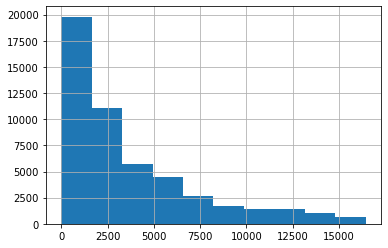

In [6]:
df['Ranking'].hist()

Из гистограммы можно увидеть,что существенная часть ресторанов входит в топ 5000 мест.

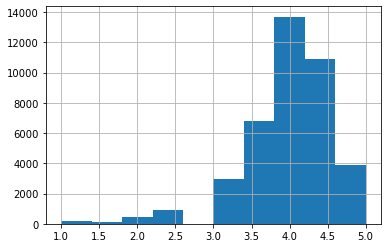

In [7]:
df['Rating'].hist()

Существенная часть ресторанов имеет нормальное растределение от 3 до 5, лишь некоторая от 1 до 2.5.

In [8]:
df['City'].value_counts().head(10)

London       7193
Paris        6108
Madrid       3813
Barcelona    3395
Berlin       2705
Milan        2694
Rome         2589
Prague       1816
Lisbon       1647
Vienna       1443
Name: City, dtype: int64

Из всех стран, представленных в датасете, можно выделить 5 стран, где количество ресторанов больше, чем в других странах 

[London, Paris, Madrid, Barcelona, Berlin].

In [9]:
def price_range(row):
    '''Функция по замене символов на более понятные значения'''

    if row == '$':
        return 'low'
    elif row == '$$ - $$$':
        return 'middle'
    else:
        return 'high'

In [10]:
def row_to_time(row):
    '''Функция по приведению строки в единый формат даты и вычисление разницы между датами'''
    if row == '[]': return None
    if len(row) == 0:return None
    if len(row) == 1:
        return datetime.now() - pd.to_datetime(row).max()
    if len(row) == 2:
        return pd.to_datetime(row).max() - pd.to_datetime(row).min()

In [11]:
def add_dummies(df, column):
    '''Функция по добавлению в датафрейм dummie-переменных'''

    dummies = pd.get_dummies(df[column], prefix=column)
    return df.join(dummies)

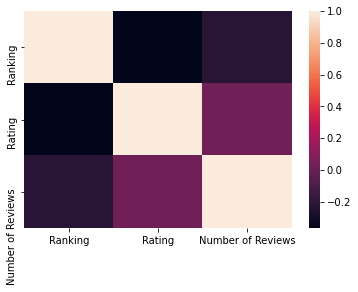

In [12]:
sn.heatmap(df[['Ranking','Rating','Number of Reviews']].corr())

In [13]:
df[['Ranking','Rating','Number of Reviews']].corr()

,Ranking,Rating,Number of Reviews
Ranking,1.000000,-0.368371,-0.223775
Rating,-0.368371,1.000000,0.030964
Number of Reviews,-0.223775,0.030964,1.000000


Исходя из таблицы корреляции:
сильнее всего коррелирует целевой признак с признаком "Ranking", так как чем меньше место (чем ближе к 1), тем выше рейтинг.

# Price Range

In [14]:
df['Price Range'].unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

Не учитывая пропущенных значений мы имеем 3 уникальных значения, можно их поменять на более понятные для восприятия значения.

Можно заменить эти символы на:

low  - низкая стоимость

middle - средняя стоимость

high - высокая стоимость

In [15]:
df['Price Range'] = df['Price Range'].dropna().apply(lambda x: price_range(x))

In [16]:
df['Price Range'].value_counts()

middle    23041
low        7816
high       1782
Name: Price Range, dtype: int64

Замена символов на более понятные значения благодаря функции price_range(), и заполнение None значений на 'middle', так как 'middle' значение является самым частым.

In [17]:
df['Price Range'] = df['Price Range'].fillna('middle')

Создание dummy-колонок из колонки ['Price Range']

In [18]:
df = add_dummies(df, 'Price Range')

In [19]:
df = df.drop(['Price Range'], axis=1)

# Cuisine Style

In [20]:
df['Cuisine Style'] = df['Cuisine Style'].dropna().apply(lambda x: x[1:-1].replace("'",'').replace(' ','').split(','))

Теперь посчитаем количество всех стилей кухонь.

In [21]:
count = Counter()
for x in df['Cuisine Style'].dropna():
    for i in x: count[i] += 1

In [22]:
count.most_common(5)

[('VegetarianFriendly', 14021),
 ('European', 12561),
 ('Mediterranean', 7820),
 ('Italian', 7433),
 ('VeganOptions', 5684)]

Отберём 5 самых встречаюзихся значений и заменим пропуски ими.

In [23]:
cousine_list = []
count = count.most_common(5)
for i in count:
    cousine_list.append(i[0])

In [24]:
df['Cuisine Style'] = df['Cuisine Style'].fillna(0).apply(lambda x: cousine_list if x == 0 else x)

Создадим 6 dummy-колонок, 5 из них будут отвечать за 5 самых часто встречающихся кухонь, а 6-я 'other' будет отвечать за все отальные.

In [25]:
for style in cousine_list:
    df[style] = df['Cuisine Style'].apply(lambda x: 1 if style in x else 0)

df['other_style'] = df['Cuisine Style'].dropna().apply(lambda x: 0 if len(list(set(cousine_list) & set(x))) > 0 else 1)

Добавим колонку количества видов кухонь.

In [26]:
df['Cuisine Count'] = df['Cuisine Style'].apply(lambda x: len(x))

In [27]:
df = df.drop(['Cuisine Style'], axis=1)

# Reviews

In [28]:
df['Days_Between_Reviews'] = df['Reviews'].str.findall('\d+/\d+/\d+').fillna('[]')
df['Days_Between_Reviews'] = df['Days_Between_Reviews'].apply(lambda x: None if len(x) == 0 else x)
df['len_dates'] = df['Days_Between_Reviews'].dropna().apply(lambda x: len(x))

In [29]:
df['len_dates'].value_counts()

2.0    36204
1.0     5680
3.0        4
Name: len_dates, dtype: int64

Можно увидеть, что обзоров, где содержатся 3 даты всего четыре штуки

In [30]:
df.loc[df['len_dates'] == 3]['Reviews'].iloc[0]

"[['The desserts arcade !', 'Visit today 3/1/2017'], ['06/02/2017', '01/03/2017']]"

Похоже,что дата была написана в отзыве, а сответственно некоторые из них дублируются, поэтому их количесво больше.

Соответственно, у каждого списка дат, нужно убрать 1й элемент.

In [31]:
df.loc[df['len_dates']==3]['Days_Between_Reviews'].apply(lambda x: x.pop(0))

9254      3/1/2017
23348    29/9/2016
42221     21/10/17
43809    30/5/2017
Name: Days_Between_Reviews, dtype: object

In [32]:
df.loc[df['len_dates']==3]['Days_Between_Reviews']

9254     [06/02/2017, 01/03/2017]
23348    [09/30/2016, 08/25/2016]
42221    [12/22/2017, 10/19/2017]
43809    [04/13/2017, 05/30/2017]
Name: Days_Between_Reviews, dtype: object

In [33]:
df['len_dates'] = df['Days_Between_Reviews'].dropna().apply(lambda x: len(x))

In [34]:
df['len_dates'].value_counts()

2.0    36208
1.0     5680
Name: len_dates, dtype: int64

Теперь переведём наши даты в формат даты и заменим пропущенные значения.

In [35]:
df['Days_Between_Reviews'] = df['Days_Between_Reviews'].dropna().apply(lambda x: row_to_time(x)).dt.days

In [36]:
df['Days_Between_Reviews'] = df['Days_Between_Reviews'].fillna(0)

Создадим колонку со средним количеством слов в отзывах

In [37]:
df['len_dates'] = df['len_dates'].fillna(0)

In [38]:
df['mean_words_reviews'] = (df['Reviews'].fillna('[]').str.findall('[a-zA-Z]+').apply(lambda x: len(x)) / df['len_dates']).fillna(0)

In [39]:
df = df.drop(['len_dates', 'Reviews'], axis=1)

# Number of Reviews

In [40]:
df['Number of Reviews'].describe()

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

Заполним пропущенные значения отзывов медианой.

In [41]:
df['Number of Reviews'] = df['Number of Reviews'].fillna(round(df['Number of Reviews'].median()))

# City

Добавим dummy-переменные к колонке 'city'

In [42]:
df = add_dummies(df, 'City')

In [43]:
df = df.drop(['City'],axis = 1)

# Restaurant_id

Из id ресторана оставим только номер 

In [44]:
df['Restaurant_id'] = df['Restaurant_id'].apply(lambda x: float(x[3:]))

In [45]:
df['Rating'] = df['Rating'].fillna(0)

# Осмотр данных

In [46]:
df.isna().sum()

Restaurant_id           0
Ranking                 0
Rating                  0
Number of Reviews       0
URL_TA                  0
ID_TA                   0
Price Range_high        0
Price Range_low         0
Price Range_middle      0
VegetarianFriendly      0
European                0
Mediterranean           0
Italian                 0
VeganOptions            0
other_style             0
Cuisine Count           0
Days_Between_Reviews    0
mean_words_reviews      0
City_Amsterdam          0
City_Athens             0
City_Barcelona          0
City_Berlin             0
City_Bratislava         0
City_Brussels           0
City_Budapest           0
City_Copenhagen         0
City_Dublin             0
City_Edinburgh          0
City_Geneva             0
City_Hamburg            0
City_Helsinki           0
City_Krakow             0
City_Lisbon             0
City_Ljubljana          0
City_London             0
City_Luxembourg         0
City_Lyon               0
City_Madrid             0
City_Milan  

In [47]:
df = df.drop(['URL_TA', 'ID_TA'], axis=1)

In [48]:
df

,Restaurant_id,Ranking,Rating,Number of Reviews,Price Range_high,Price Range_low,Price Range_middle,VegetarianFriendly,European,Mediterranean,Italian,VeganOptions,other_style,Cuisine Count,Days_Between_Reviews,mean_words_reviews,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
0,5569.0,5570.0,3.5,194.0,0,0,1,0,1,0,0,0,0,3,41.0,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1535.0,1537.0,4.0,10.0,0,0,1,1,1,1,1,1,0,5,382.0,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,352.0,353.0,4.5,688.0,1,0,0,1,0,0,0,1,0,7,2.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3456.0,3458.0,5.0,3.0,0,0,1,1,1,1,1,1,0,5,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,615.0,621.0,4.0,84.0,0,0,1,1,0,0,0,0,0,3,272.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9995.0,4367.0,0.0,28.0,0,1,0,1,0,0,0,0,0,4,122.0,5.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49996,9996.0,2612.0,0.0,2.0,0,0,1,0,0,0,0,0,1,4,1030.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49997,9997.0,5562.0,0.0,2.0,0,0,1,1,1,1,1,1,0,5,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
49998,9998.0,4010.0,0.0,2.0,0,0,1,0,0,0,1,0,0,1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [49]:
df.corr()

,Restaurant_id,Ranking,Rating,Number of Reviews,Price Range_high,Price Range_low,Price Range_middle,VegetarianFriendly,European,Mediterranean,Italian,VeganOptions,other_style,Cuisine Count,Days_Between_Reviews,mean_words_reviews,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
Restaurant_id,1.000000,0.825090,-0.257137,-0.184113,-0.070916,-0.012423,0.044837,-0.116590,-0.094577,0.015872,0.053237,-0.009314,0.185584,-0.151826,0.096765,-0.061623,-0.075400,-0.077906,0.012751,-0.021798,-0.065658,-0.079520,-0.080412,-0.075961,-0.077819,-0.079545,-0.072153,-0.081744,-0.067557,-0.072915,-0.071563,-0.054298,0.412226,-0.054126,-0.079011,0.044595,-0.029714,-0.074983,-0.074559,-0.067262,0.271745,-0.067389,-0.036823,-0.076790,-0.076732,-0.077394,-0.072592
Ranking,0.825090,1.000000,-0.109897,-0.221099,-0.088647,-0.014712,0.055295,-0.142216,-0.116506,0.019635,0.065754,-0.011366,0.224730,-0.188270,0.116506,-0.076674,-0.094100,-0.094479,0.015683,-0.026436,-0.075731,-0.094241,-0.095421,-0.093549,-0.094884,-0.092380,-0.087158,-0.096430,-0.082057,-0.087200,-0.089639,-0.061906,0.499127,-0.065961,-0.096835,0.056229,-0.036015,-0.094920,-0.089770,-0.083496,0.330099,-0.082766,-0.043811,-0.095269,-0.090999,-0.096816,-0.091422
Rating,-0.257137,-0.109897,1.000000,0.011016,0.018409,0.023520,-0.030353,0.024434,0.004971,0.004539,-0.002503,0.009801,-0.024368,0.025161,-0.012969,0.008976,0.007447,0.016852,-0.000703,0.012834,-0.002550,-0.003957,0.006301,0.000948,0.005758,0.005484,0.002312,0.002112,-0.004032,0.007538,-0.000081,0.007644,-0.006952,-0.002940,-0.005922,-0.016232,-0.023233,-0.003420,0.009654,-0.007143,-0.007362,0.001123,0.027527,-0.010417,0.010188,0.001580,-0.001481
Number of Reviews,-0.184113,-0.221099,0.011016,1.000000,0.167197,-0.041263,-0.040655,0.159744,0.018258,-0.035690,-0.083822,0.039977,-0.139193,0.229160,-0.147778,0.097504,0.014304,-0.012736,0.009560,-0.048432,-0.021399,-0.017142,0.014911,-0.012159,0.013641,0.048830,-0.022405,-0.040642,-0.018715,0.002081,0.001825,-0.007977,0.018885,-0.009639,-0.017975,-0.023034,0.036038,-0.023730,0.003499,-0.007525,-0.007293,-0.003235,0.133969,-0.023779,-0.025348,-0.026477,-0.019991
Price Range_high,-0.070916,-0.088647,0.018409,0.167197,1.000000,-0.082750,-0.394421,0.012566,0.028337,-0.055955,-0.080656,-0.052779,-0.029809,0.030844,-0.049797,0.036658,-0.005216,-0.003191,-0.007289,-0.019269,0.000567,0.001463,-0.006398,0.006638,-0.010765,-0.006724,0.030942,-0.006571,0.002303,-0.006951,-0.008885,-0.001480,0.006038,0.002426,-0.005185,-0.006054,0.005249,0.009514,-0.004677,0.016030,0.021516,-0.013102,0.002789,-0.003653,-0.008009,-0.000774,0.020962
Price Range_low,-0.012423,-0.014712,0.023520,-0.041263,-0.082750,1.000000,-0.883140,-0.165323,-0.235216,-0.202865,-0.177148,-0.181859,0.130789,-0.160875,-0.012850,0.076427,0.000853,0.026151,0.013418,0.001255,-0.013572,-0.012189,0.025465,-0.016065,0.008726,0.034793,-0.030717,-0.029457,-0.007524,0.030199,0.024543,0.010186,0.022690,-0.019881,-0.030072,-0.032172,0.024849,-0.022453,0.031132,-0.013604,-0.037974,0.014166,0.059721,-0.037741,-0.020912,-0.003104,-0.022305
Price Range_middle,0.044837,0.055295,-0.030353,-0.040655,-0.394421,-0.883140,1.000000,0.146528,0.203552,0.213400,0.201313,0.192536,-0.106568,0.133823,0.035289,-0.087728,0.001669,-0.022612,-0.008941,0.007913,0.012247,0.010551,-0.020469,0.011688,-0.002979,-0.028917,0.013758,0.030255,0.005853,-0.024574,-0.018449,-0.008696,-0.023764,0.017190,0.030170,0.032515,-0.025384,0.016225,-0.026505,0.004998,0.024888,-0.006895,-0.056381,0.036520,0.023053,0.003227,0.010700
VegetarianFriendly,-0.116590,-0.142216,0.024434,0.159744,0.012566,-0.165323,0.146528,1.000000,0.426884,0.479053,0.4405

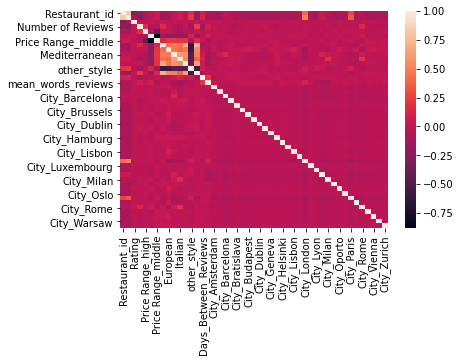

In [50]:
sn.heatmap(df.corr())

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [51]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating'], axis = 1)
y = df['Rating']

In [52]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [53]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [54]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [55]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [56]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.25480679999999994
